In [25]:

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition

In [26]:
#import libraries
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
from torch import nn
from torchvision import models

In [27]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True)
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(x_lstm[:,-1,:]))

In [28]:
im_size = 112
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
sm = nn.Softmax()
inv_normalize =  transforms.Normalize(mean=-1*np.divide(mean,std),std=np.divide([1,1,1],std))
def im_convert(tensor):
    """ Display a tensor as an image. """
    image = tensor.to("cpu").clone().detach()
    image = image.squeeze()
    image = inv_normalize(image)
    image = image.numpy()
    image = image.transpose(1,2,0)
    image = image.clip(0, 1)
    cv2.imwrite('./2.png',image*255)
    return image

def predict(model,img,path = './'):
  fmap,logits = model(img.to('cuda'))
  params = list(model.parameters())
  weight_softmax = model.linear1.weight.detach().cpu().numpy()
  logits = sm(logits)
  _,prediction = torch.max(logits,1)
  confidence = logits[:,int(prediction.item())].item()*100
  print('confidence of prediction:',logits[:,int(prediction.item())].item()*100)
  idx = np.argmax(logits.detach().cpu().numpy())
  bz, nc, h, w = fmap.shape
  out = np.dot(fmap[-1].detach().cpu().numpy().reshape((nc, h*w)).T,weight_softmax[idx,:].T)
  predict = out.reshape(h,w)
  predict = predict - np.min(predict)
  predict_img = predict / np.max(predict)
  predict_img = np.uint8(255*predict_img)
  out = cv2.resize(predict_img, (im_size,im_size))
  #heatmap = 
  img = im_convert(img[:,-1,:,:,:])
  result =  img*0.8*255
  cv2.imwrite('/content/drive/MyDrive/Qriocity/Secure Vision/Subset/Deep-Fake/train/fake_0_jpg.rf.627e22b7f278a118695d126f4ee791f6.jpg',result)
  result1 = img*0.8
  r,g,b = cv2.split(result1)
  result1 = cv2.merge((r,g,b))
  plt.imshow(result1)
  plt.show()
  return [int(prediction.item()),confidence]
#img = r"C:\Users\shubh\Downloads\003.png"
#predict(model,img)

In [29]:
#!pip3 install face_recognition
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class validation_dataset(Dataset):
    def __init__(self,video_names,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a) 
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        return frames.unsqueeze(0)
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path) 
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

C:\Users\shubh\Downloads\abarnvbtwb.mp4
confidence of prediction: 84.69574451446533


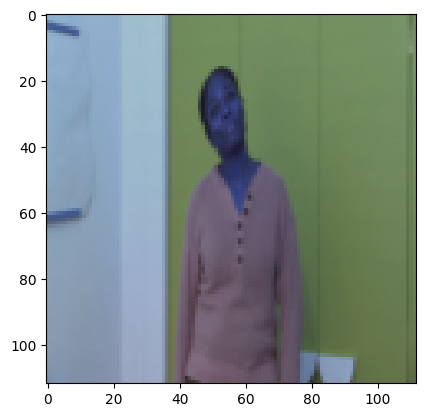

REAL


In [34]:
#Code for making prediction
im_size = 112
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
#path_to_videos = ['/content/drive/My Drive/Balanced_Face_only_data/aagfhgtpmv.mp4',
                                  # '/content/drive/My Drive/Balanced_Face_only_data/aczrgyricp.mp4',
                                  # '/content/drive/My Drive/Balanced_Face_only_data/agdkmztvby.mp4',
                                  # '/content/drive/My Drive/Balanced_Face_only_data/abarnvbtwb.mp4']

#path_to_videos = ['/content/drive/My Drive/Youtube_Face_only_data/000_003.mp4',
                 # '/content/drive/My Drive/Youtube_Face_only_data/000.mp4',
                 # '/content/drive/My Drive/Youtube_Face_only_data/002_006.mp4',
                 # '/content/drive/My Drive/Youtube_Face_only_data/002.mp4'
                  

#]

path_to_videos= [r"C:\Users\shubh\Downloads\abarnvbtwb.mp4"]

video_dataset = validation_dataset(path_to_videos,sequence_length = 20,transform = train_transforms)
model =Model(2).cuda()
path_to_model = r"C:\Users\shubh\Downloads\model_97_acc_100_frames_FF_data.pt"
model.load_state_dict(torch.load(path_to_model))
model.eval()
for i in range(0,len(path_to_videos)):
  print(path_to_videos[i])
  prediction = predict(model,video_dataset[i],'./')
  if prediction[0] == 1:
    print("REAL")
  else:
    print("FAKE")

In [13]:
#Optional : If you want to pass full frame for prediction instead of face cropped frame
#code for full frame processing
class validation_dataset(Dataset):
    def __init__(self,video_names,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a) 
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        return frames.unsqueeze(0)
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path) 
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image

In [52]:
import torch

# Assuming 'tensor' is the tensor you want to delete


# Assuming 'model' is the model you want to delete
del model

# Use torch.cuda.empty_cache() to release all unoccupied cached memory currently held by the caching allocator.
torch.cuda.empty_cache()

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [49]:
import cv2
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset
#from model import Model  # Assuming you have defined the model architecture in a separate file

# Define the dataset class to load and preprocess video frames
class VideoDataset(Dataset):
    def __init__(self, video_paths, sequence_length, transform=None):
        self.video_paths = video_paths
        self.sequence_length = sequence_length
        self.transform = transform

    def __len__(self):
        return len(self.video_paths)

    def __getitem__(self, idx):
        video_path = self.video_paths[idx]
        cap = cv2.VideoCapture(video_path)
        frames = []
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            if self.transform:
                frame = self.transform(frame)
            frames.append(frame)
        cap.release()
        frames = torch.stack(frames)
        if len(frames) < self.sequence_length:
            frames = torch.cat([frames] * (self.sequence_length // len(frames) + 1))
        frames = frames[:self.sequence_length]
        return frames

# Define image transformation
# Define image transformation
im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
video_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((im_size, im_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Define paths to video files
path_to_videos = [r"C:\Users\shubh\Downloads\Untitled video - Made with Clipchamp (9).mp4"]

# Initialize the dataset
video_dataset = VideoDataset(path_to_videos, sequence_length=20, transform=video_transforms)

# Load the pre-trained model
model = Model(2).cuda()  # Assuming the model architecture is defined and loaded properly
path_to_model = r"C:\Users\shubh\Downloads\model_97_acc_100_frames_FF_data.pt"
model.load_state_dict(torch.load(path_to_model))
model.eval()


# Make predictions on each video
# Make predictions on each video
for video_path in path_to_videos:
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # Get total number of frames in the video
    
    # Define the sequence length (you can choose a fixed length or use the total number of frames)
    sequence_length = frame_count  # Use total number of frames as sequence length
    
    for frame_num in range(3):  # Display predictions for only the first three frames
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        frame_tensor = video_transforms(frame).unsqueeze(0).unsqueeze(0).cuda()  # Add batch and sequence dimension
        
        # Repeat the frame along the sequence dimension
        frames = frame_tensor.repeat(1, sequence_length, 1, 1, 1)  # Repeat the frame along the sequence dimension
        
        prediction = predict(model, frames)
        print(f"Frame {frame_num}: {prediction}")
    cap.release()




OutOfMemoryError: CUDA out of memory. Tried to allocate 64.00 MiB. GPU 0 has a total capacity of 4.00 GiB of which 0 bytes is free. Of the allocated memory 10.67 GiB is allocated by PyTorch, and 97.48 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [43]:
PYTORCH_NO_CUDA_MEMORY_CACHING=1 

In [47]:
expandable_segments:True

In [7]:
import cv2
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

# Define the dataset class to load and preprocess video frames
class VideoDataset(Dataset):
    def __init__(self, video_paths, sequence_length, transform=None):
        self.video_paths = video_paths
        self.sequence_length = sequence_length
        self.transform = transform

    def __len__(self):
        return len(self.video_paths)

    def __getitem__(self, idx):
        video_path = self.video_paths[idx]
        cap = cv2.VideoCapture(video_path)
        frames = []
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            if self.transform:
                frame = self.transform(frame)
            frames.append(frame)
        cap.release()
        frames = torch.stack(frames)
        if len(frames) < self.sequence_length:
            frames = torch.cat([frames] * (self.sequence_length // len(frames) + 1))
        frames = frames[:self.sequence_length]
        return frames

# Define image transformation
im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
video_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((im_size, im_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Convert color channels from [0, 255] to [0, 1]
def convert_color_channels(frame):
    return frame / 255.0

# Define paths to video files
path_to_videos = [r"C:\Users\shubh\Downloads\abarnvbtwb.mp4"]

# Initialize the dataset
video_dataset = VideoDataset(path_to_videos, sequence_length=20, transform=video_transforms)

# Load the pre-trained model
class Model(nn.Module):
    def __init__(self, num_classes, latent_dim=2048, lstm_layers=1, hidden_dim=2048, bidirectional=False):
        super(Model, self).__init__()
        self.model = nn.Sequential(*list(models.resnext50_32x4d(pretrained=True).children())[:-2])
        self.lstm = nn.LSTM(latent_dim, hidden_dim, lstm_layers, bidirectional)
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048, num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)

    def forward(self, x):
        batch_size, seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size, seq_length, 2048)
        x_lstm, _ = self.lstm(x, None)
        return fmap, self.dp(self.linear1(x_lstm[:, -1, :]))

model = Model(2).cuda()
path_to_model = r"C:\Users\shubh\Downloads\model_97_acc_100_frames_FF_data.pt"
model.load_state_dict(torch.load(path_to_model))
model.eval()

# Define softmax layer and inverse normalization
sm = nn.Softmax()
inv_normalize = transforms.Normalize(mean=-1*np.divide(mean, std), std=np.divide([1, 1, 1], std))

# Function to convert tensor to image
def im_convert(tensor):
    image = tensor.to("cpu").clone().detach()
    image = image.squeeze()
    image = inv_normalize(image)
    image = image.numpy()
    image = image.transpose(1, 2, 0)
    image = image.clip(0, 1)
    return image

# Function to make predictions
def predict(model, img, path='./'):
    fmap, logits = model(img.to('cuda'))
    logits = sm(logits)
    _, prediction = torch.max(logits, 1)
    confidence = logits[:, int(prediction.item())].item() * 100

    # Further processing for visualization
    img = im_convert(img[:, -1, :, :, :])
    heatmap = generate_heatmap(fmap, model.linear1.weight.detach().cpu().numpy())
    result = blend_heatmap_with_image(heatmap, img)

    # Save the result
    cv2.imwrite('result.jpg', result)

    # Display the result
    plt.imshow(result)
    plt.show()

    return [int(prediction.item()), confidence]

def generate_heatmap(fmap, weight_softmax):
    bz, nc, h, w = fmap.shape
    print("Shape of fmap:", fmap.shape)
    print("Shape of weight_softmax:", weight_softmax.shape)
    out = np.dot(fmap[-1].detach().cpu().numpy().reshape((nc, h*w)).T, weight_softmax.T)
    print("Shape of out:", out.shape)
    predict = out.reshape(h, w)
    print("Shape of predict:", predict.shape)
    predict = predict - np.min(predict)
    predict_img = predict / np.max(predict)
    predict_img = np.uint8(255 * predict_img)
    return predict_img


# Function to blend heatmap with original image
def blend_heatmap_with_image(heatmap, img):
    result = heatmap * 0.5 + img * 0.8 * 255
    result = np.clip(result, 0, 255)
    result = result.astype(np.uint8)
    return result

# Make predictions on each video
for video_path in path_to_videos:
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # Get total number of frames in the video

    # Define the sequence length (you can choose a fixed length or use the total number of frames)
    sequence_length = frame_count  # Use total number of frames as sequence length

    for frame_num in range(frame_count):
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        frame = convert_color_channels(frame)  # Convert color channels to [0, 1]
        frame_tensor = video_transforms(frame).unsqueeze(0).unsqueeze(0).cuda() 
        frames = frame_tensor.repeat(1, sequence_length, 1, 1, 1)
        prediction = predict(model, frames)
        print(f"Frame {frame_num}: {prediction}")
    cap.release()


C:\Users\shubh\anaconda3\envs\ns\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\shubh\anaconda3\envs\ns\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


KeyboardInterrupt: 

In [21]:
import cv2
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have defined the Model class in a separate file
# from model import Model

# Define the dataset class to load and preprocess video frames
class VideoDataset(Dataset):
    def __init__(self, video_paths, transform=None):
        self.video_paths = video_paths
        self.transform = transform

    def __len__(self):
        return len(self.video_paths)

    def __getitem__(self, idx):
        video_path = self.video_paths[idx]
        cap = cv2.VideoCapture(video_path)
        frames = []
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            if self.transform:
                frame = self.transform(frame)
            frames.append(frame)
        cap.release()
        return frames

# Define image transformation
im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
video_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((im_size, im_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Load the pre-trained model
model = Model(2).cuda()  # Assuming the model architecture is defined and loaded properly
path_to_model = r"C:\Users\shubh\Downloads\model_97_acc_100_frames_FF_data.pt"
model.load_state_dict(torch.load(path_to_model))
model.eval()

# Define function to predict and overlay result on frames
sm = nn.Softmax()
inv_normalize = transforms.Normalize(mean=-1*np.divide(mean,std), std=np.divide([1,1,1], std))
def predict_and_overlay(model, frames, path='./output.mp4'):
    height, width, _ = frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Define the codec
    out = cv2.VideoWriter(path, fourcc, 25, (width, height))  # Create VideoWriter object
    
    with torch.no_grad():
        for frame in frames:
            frame_tensor = video_transforms(frame).unsqueeze(0).unsqueeze(0).cuda()
            fmap, logits = model(frame_tensor)
            prediction, confidence = predict(model, frame_tensor)
            overlay_text = f"Prediction: {prediction}, Confidence: {confidence:.2f}%"
            
            # Convert RGB to BGR
            frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
            
            # Draw overlay text
            cv2.putText(frame_bgr, overlay_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            
            # Write frame with overlay text to video
            out.write(frame_bgr)
    
    out.release()





def predict(model, img):
    fmap, logits = model(img)
    logits = sm(logits)
    _, prediction = torch.max(logits, 1)
    confidence = logits[:, int(prediction.item())].item() * 100
    return int(prediction.item()), confidence

# Define paths to video files
path_to_videos = [r"C:\Users\shubh\Downloads\download.mp4"]

# Initialize the dataset
video_dataset = VideoDataset(path_to_videos, transform=None)

# Iterate over each video in the dataset
for video_frames in video_dataset:
    predict_and_overlay(model, video_frames)
